In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
#
import os
# os.chdir('/content/drive/My Drive/Deep Fashion Retrieval/deep-fashion-retrieval')

In [5]:
import os
# from config import *


11

In [ ]:
# from data import Fashion_inshop
# dataset = Fashion_inshop(type="test_query")
# print(dataset.test_gallery_len)

from feaure_extractor import get_inshop_test_db
query_feat_dict, (deep_feats, color_feats, labels) = get_inshop_test_db()

# from in_shop_eval import load_inshop_test_db
# inshop_test_db_dict = load_inshop_test_db()

# length = len(dataset)
# deep_feats, color_feats, labels = inshop_test_db_dict['test_query']
# deep_feats, color_feats, labels = deep_feats[-length:], color_feats[-length:], labels[-length:]
# feat_dict = {labels[i]: (deep_feats[i], color_feats[i]) for i in range(len(labels))}
# print(f'feat_dict: {feat_dict}')

# from retrieval import get_deep_color_top_n
# for iter_id, (img, img_path) in enumerate(dataset):
#     get_deep_color_top_n(img_path, deep_feats, color_feats, labels, retrieval_top_n)

# import numpy as np
# retrieval_top_n=(1, 10, 20, 50)
# result_arr = np.zeros((dataset.test_query_len, len(retrieval_top_n)))
#
# a = [1,2,3,4]
# if 2 in a:
#     result_arr[0, 1:] = 1
#
# for i,j in zip(a, result_arr.sum(axis=0)):
#     print(i,j)

In [1]:
# Creates feature db. Run this every time you load a new model.
! python feaure_extractor.py --scrapped

/home/ma02526/anaconda3/envs/deep-fashion-retrieval/lib/python3.8/site-packages/torchvision/transforms/transforms.py:210: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +
Loading model freeze=False/lr=0.001/29_epochs
Extracting features from scrapped dataset.
dump function called with custom: True
all_list: ['/home/ma02526/ResNet/base/scrapped/jdot/0a0696c7b8f9c84c97e916cafac11a491b2f1230.jpg', '/home/ma02526/ResNet/base/scrapped/jdot/0ad8953502aa99550cb26556560eb64fface5db7.jpg', '/home/ma02526/ResNet/base/scrapped/jdot/0bbbcba93098a2a8cea59e3cc531685efc30e2ed.jpg', '/home/ma02526/ResNet/base/scrapped/jdot/0d615c7c56e76fdf84e9b48191240755f4cc3804.jpg', '/home/ma02526/ResNet/base/scrapped/jdot/0dbc2f21435c0e1cfc8b3f883d6c47df464e4e5b.jpg', '/home/ma02526/ResNet/base/scrapped/jdot/0df6793aa25b13e2e51b70712dc6f74c5315159f.jpg', '/home/ma02526/ResNet/bas

Loading model...
Loading model freeze=False/lr=0.001/29_epochs
Loading model Done. Time: 0.434 sec
Loading feature database...
Loading feature database Done. Time: 0.001 sec
Extracting image feature...
img_path: /home/ma02526/ResNet/base/hu_men/IMG_20200120_145822.jpg
Custom: True
Extracting image feature Done. Time: 0.199 sec
Doing naive query...
Doing naive query Done. Time: 0.000 sec
Naive query result: [('/home/ma02526/ResNet/base/scrapped/furor/77906fcf947f40b7e79769de4fd9086f60cae4ba.jpg', -4.29264045424013), ('/home/ma02526/ResNet/base/scrapped/furor/ee1eb2fa967b8787b8a96b234cd95a0676dfe48c.jpg', -4.334972853662564), ('/home/ma02526/ResNet/base/scrapped/furor/75dbe92ab170f8c4c9ecbd169bea2c5f5dbd83d9.jpg', -4.352850080939946), ('/home/ma02526/ResNet/base/scrapped/furor/1a639e31574257c68cece92c3340f3e414223eb7.jpg', -4.604305490206158), ('/home/ma02526/ResNet/base/scrapped/furor/907f6c550c1ce11d9fe856d6aaad6fd0bc4e041f.jpg', -5.0528962789202705)]
Extracting image feature...
img_pa

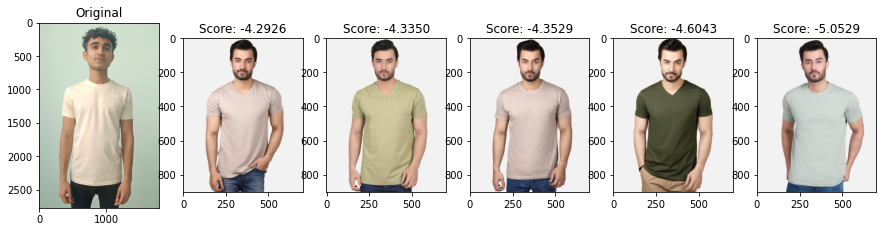

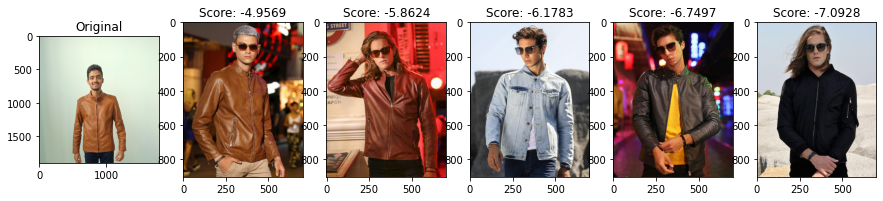

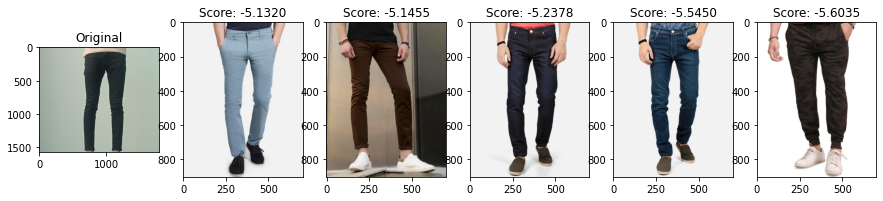

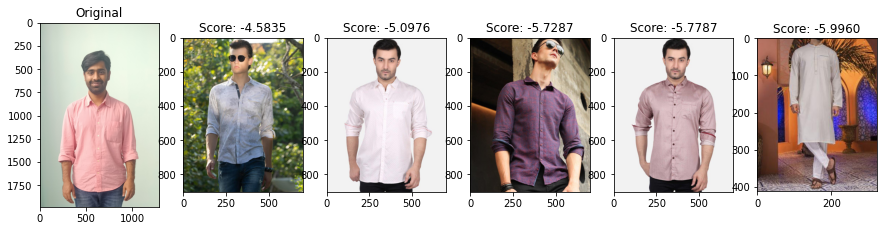

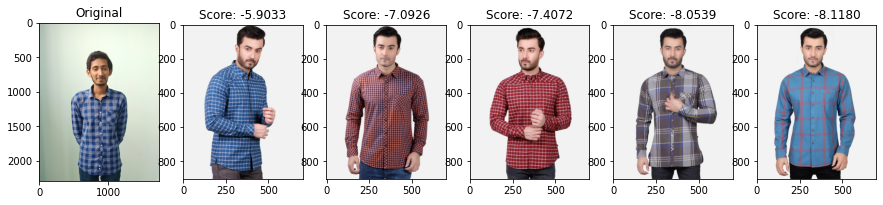

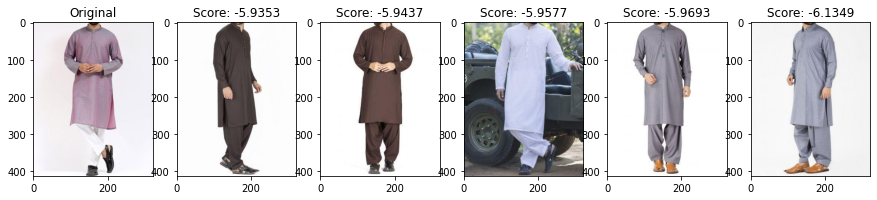

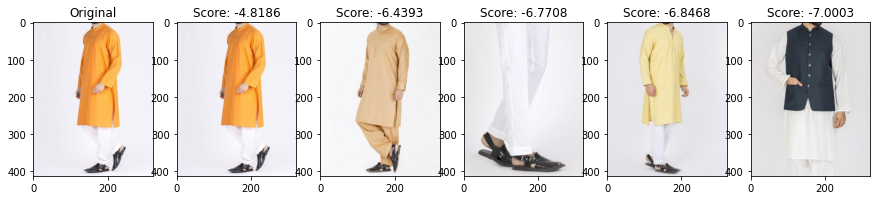

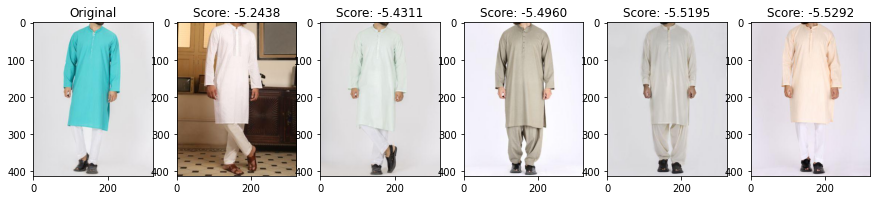

In [3]:
from retrieval import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = [10, 5]

# example = "img/Sheer_Pleated-Front_Blouse/img_00000005.jpg"
# example = "img/Abstract-Patterned_Blouse/img_00000004.jpg"
# example = "hu_men/IMG_20200130_152400.jpg"
# example = "hu_men/IMG_20200120_145822.jpg"

examples = ["hu_men/IMG_20200120_145822.jpg", #- talha's beige round neck tshirt
            "hu_men/IMG_20200130_152400.jpg", #- saad saleem's brown leather jacket
            "hu_men/IMG_20200120_145759.jpg", #- talha's black skinny jeans
            "hu_men/IMG_20200130_122739.jpg", #- mursalin's pink shirt
            "hu_men/IMG_20200130_123311.jpg", #- burhan's dark blue checked shirt
            "scrapped/jdot/2f1a88faa0112ca51d8f320b935f6bfc9c05829d.jpg",
            "scrapped/jdot/8dfe1fea818660ff809f7c2acd8abfcae2a84e70.jpg", #- mustard yellow shalwar kameez
            "scrapped/jdot/9d7209a5aa1747f3c82a939ec039244bc608c67d.jpg"]

extractor = load_test_model()

# deep_feats, color_feats, labels = load_feat_db()
deep_feats, color_feats, labels = load_feat_db(custom=True)

for example in examples:
    # f = dump_single_feature(example, extractor)
    f = dump_single_feature(example, extractor, custom=True)

    if any(list(map(lambda x: x is None, f))):
        print("Input feature is None")
        exit()

    # clf = load_kmeans_model()

    result = naive_query(f, deep_feats, color_feats, labels, 5)
    # result_kmeans = kmeans_query(clf, f, deep_feats, color_feats, labels, 5)

    print("Naive query result:", result)
    # print("K-Means query result:", result_kmeans)
    visualize(example, result)
    # print("Query result:", result_kmeans)
    # visualize(example, result_kmeans)

In [0]:
from net import *

INTER_DIM = 512
CATEGORIES = 20
DUMPED_MODEL = "model_10_final.pth.tar"

f_model(freeze_param=False, inter_dim=INTER_DIM, num_classes=CATEGORIES, model_path=DUMPED_MODEL)

Loading model model_10_final.pth.tar


f_model(
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64,

In [0]:
from retrieval import *
load_feat_db(custom=True)

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:220: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Loading feature database...
Loading feature database Done. Time: 2.079 sec


(array([[ 0.7963941 , -0.16327731,  0.5005752 , ...,  0.00348724,
         -0.01936189, -0.13899098],
        [ 0.4721783 , -0.14658882,  0.11951138, ...,  0.00857361,
          0.07727434,  0.00837347],
        [-0.37405765,  0.11140244, -0.46851936, ..., -0.18382262,
          0.19089377,  0.1422693 ],
        ...,
        [ 0.03143787,  0.41380578, -0.43167892, ..., -0.1448812 ,
          0.7498995 , -0.5666169 ],
        [ 0.5645923 ,  0.4655726 , -0.21555622, ..., -0.01802251,
          0.5896938 , -0.40011552],
        [ 0.15612942, -0.1948817 ,  0.3831291 , ..., -0.09387633,
         -0.13536413, -0.114146  ]], dtype=float32),
 array([[ 0.91488415,  0.80392444,  1.010124  , ...,  1.6851585 ,
          0.43946248,  0.28979933],
        [ 1.9392041 ,  0.5943625 ,  1.6660447 , ...,  2.416723  ,
          0.79087085,  1.6521537 ],
        [-0.17305714, -1.1172597 , -0.678355  , ..., -1.3056177 ,
         -0.7970065 , -1.334366  ],
        ...,
        [-0.2391158 ,  0.4897408 , -1.4

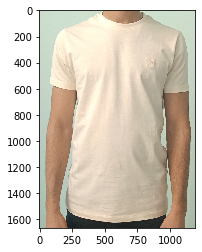

In [0]:
from torchvision import datasets, models, transforms
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image

import torch

CROP_SIZE = 224

data_transform_test = transforms.Compose([
    transforms.Resize(CROP_SIZE),
    transforms.CenterCrop(CROP_SIZE)
    # transforms.ToTensor(),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

path = '/content/drive/My Drive/Deep Fashion Retrieval/base/hu_men/IMG_20200120_145822.jpg'

# from read_crop in data.py
with open(path, 'rb') as f:
            with Image.open(f) as img:
                img = img.convert('RGB')
                x1, y1, x2, y2 = 257, 823, 1449, 2488
                if x1 < x2 <= img.size[0] and y1 < y2 <= img.size[1]:
                    img = img.crop((x1, y1, x2, y2))

plt.imshow(img)

In [0]:
def read_lines(path):
        with open(path) as fin:
            lines = fin.readlines()[2:]
            lines = list(filter(lambda x: len(x) > 0, lines))
            pairs = list(map(lambda x: x.strip().split(), lines))
        return pairs

def read_bbox():
        list_bbox = '/content/drive/My Drive/Deep Fashion Retrieval/base/list_bbox_custom.txt'
        pairs = read_lines(list_bbox)
        bbox = dict()
        for k, x1, y1, x2, y2 in pairs:
            bbox[k] = [x1, y1, x2, y2]
        return bbox

# print(read_lines('/content/drive/My Drive/Deep Fashion Retrieval/base/list_bbox_custom'))
print(read_bbox()['IMG_20200120_145822.jpg'])

['257', '823', '1449', '2488']


In [1]:
# Test 20 cat model
from train import test
test(0, full=True)

/home/ma02526/anaconda3/envs/deep-fashion-retrieval/lib/python3.8/site-packages/torchvision/transforms/transforms.py:210: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +
/home/ma02526/anaconda3/envs/deep-fashion-retrieval/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/ma02526/anaconda3/envs/deep-fashion-retrieval/lib/python3.8/site-packages/torchvision/transforms/transforms.py:697: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please 

Loading model model_10_final.pth.tar
Loading model model_10_final.pth.tar

Test set: Average loss: 1.1550
Top 1 Accuracy: 24434/38784 (63%)
Top 3 Accuracy: 33849/38784 (87%)
Top 5 Accuracy: 36783/38784 (95%)
 


In [2]:
# Test 20 cat model in-shop. Only on tops
from in_shop_eval import eval
acc_dict = eval(list(range(1, 51)))
acc_dict

Extracting features of in-shop test images.
0 / 7901
0 / 8883
n = 1. Accuracy = 54.52%.
n = 2. Accuracy = 65.83%.
n = 3. Accuracy = 71.18%.
n = 4. Accuracy = 74.73%.
n = 5. Accuracy = 77.58%.
n = 6. Accuracy = 79.52%.
n = 7. Accuracy = 81.14%.
n = 8. Accuracy = 82.34%.
n = 9. Accuracy = 83.34%.
n = 10. Accuracy = 84.24%.
n = 11. Accuracy = 85.13%.
n = 12. Accuracy = 85.76%.
n = 13. Accuracy = 86.45%.
n = 14. Accuracy = 87.10%.
n = 15. Accuracy = 87.57%.
n = 16. Accuracy = 88.03%.
n = 17. Accuracy = 88.39%.
n = 18. Accuracy = 88.83%.
n = 19. Accuracy = 89.20%.
n = 20. Accuracy = 89.63%.
n = 21. Accuracy = 89.98%.
n = 22. Accuracy = 90.21%.
n = 23. Accuracy = 90.39%.
n = 24. Accuracy = 90.67%.
n = 25. Accuracy = 90.83%.
n = 26. Accuracy = 91.02%.
n = 27. Accuracy = 91.24%.
n = 28. Accuracy = 91.48%.
n = 29. Accuracy = 91.70%.
n = 30. Accuracy = 91.88%.
n = 31. Accuracy = 92.09%.
n = 32. Accuracy = 92.29%.
n = 33. Accuracy = 92.46%.
n = 34. Accuracy = 92.64%.
n = 35. Accuracy = 92.83%.
n 

100%|██████████| 8883/8883 [01:37<00:00, 91.35it/s]


{1: 54.51986941348643,
 2: 65.83361476978499,
 3: 71.18090735112011,
 4: 74.72700664190026,
 5: 77.57514353259035,
 6: 79.52268377800293,
 7: 81.14375773950242,
 8: 82.3370482944951,
 9: 83.33896206236632,
 10: 84.23955870764381,
 11: 85.12889789485534,
 12: 85.75931554654959,
 13: 86.44602048857368,
 14: 87.09895305639986,
 15: 87.57176629517055,
 16: 88.03332207587526,
 17: 88.39356073398626,
 18: 88.83260159855905,
 19: 89.20409771473601,
 20: 89.63188112124281,
 21: 89.98086232128786,
 22: 90.20601148260722,
 23: 90.38613081166272,
 24: 90.66756726331194,
 25: 90.8251716762355,
 26: 91.01654846335697,
 27: 91.24169762467635,
 28: 91.47810424406168,
 29: 91.70325340538106,
 30: 91.88337273443656,
 31: 92.086006979624,
 32: 92.28864122481144,
 33: 92.45750309580096,
 34: 92.63762242485647,
 35: 92.82899921197793,
 36: 92.9528312507036,
 37: 93.07666328942925,
 38: 93.2004953281549,
 39: 93.30181245074863,
 40: 93.43690194754024,
 41: 93.52696161206799,
 42: 93.63953619272768,
 43: 93

In [1]:
# Test 20 cat model in-shop. On entire test set
from in_shop_eval import eval
acc_dict = eval(list(range(1, 51)))
acc_dict

/home/ma02526/anaconda3/envs/deep-fashion-retrieval/lib/python3.8/site-packages/torchvision/transforms/transforms.py:210: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +
/home/ma02526/anaconda3/envs/deep-fashion-retrieval/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
100%|██████████| 14218/14218 [04:28<00:00, 52.98it/s]


Loading model model_10_final.pth.tar
Extracting features of in-shop test images.
0 / 12612
0 / 14218
n = 1. Accuracy = 52.72%.
n = 2. Accuracy = 63.19%.
n = 3. Accuracy = 68.58%.
n = 4. Accuracy = 71.92%.
n = 5. Accuracy = 74.37%.
n = 6. Accuracy = 76.38%.
n = 7. Accuracy = 78.06%.
n = 8. Accuracy = 79.30%.
n = 9. Accuracy = 80.33%.
n = 10. Accuracy = 81.21%.
n = 11. Accuracy = 82.09%.
n = 12. Accuracy = 82.87%.
n = 13. Accuracy = 83.43%.
n = 14. Accuracy = 84.02%.
n = 15. Accuracy = 84.53%.
n = 16. Accuracy = 85.03%.
n = 17. Accuracy = 85.46%.
n = 18. Accuracy = 85.81%.
n = 19. Accuracy = 86.22%.
n = 20. Accuracy = 86.59%.
n = 21. Accuracy = 87.01%.
n = 22. Accuracy = 87.30%.
n = 23. Accuracy = 87.61%.
n = 24. Accuracy = 87.97%.
n = 25. Accuracy = 88.17%.
n = 26. Accuracy = 88.46%.
n = 27. Accuracy = 88.60%.
n = 28. Accuracy = 88.87%.
n = 29. Accuracy = 89.06%.
n = 30. Accuracy = 89.30%.
n = 31. Accuracy = 89.52%.
n = 32. Accuracy = 89.76%.
n = 33. Accuracy = 89.91%.
n = 34. Accuracy 

{1: 52.72190181460121,
 2: 63.19454212969475,
 3: 68.57504571669715,
 4: 71.92291461527641,
 5: 74.37051624701083,
 6: 76.37501758334506,
 7: 78.05598537065691,
 8: 79.30088620059081,
 9: 80.33478688985792,
 10: 81.20692080461387,
 11: 82.09312139541426,
 12: 82.86678857785905,
 13: 83.42945561963708,
 14: 84.02025601350401,
 15: 84.53368968912646,
 16: 85.02602335068224,
 17: 85.45505697003797,
 18: 85.81375720917147,
 19: 86.22169081446054,
 20: 86.59445772963849,
 21: 87.00942467294979,
 22: 87.29779153186102,
 23: 87.60725840483894,
 24: 87.96595864397243,
 25: 88.16992544661696,
 26: 88.4582923055282,
 27: 88.59895906597272,
 28: 88.86622591081728,
 29: 89.06315937543958,
 30: 89.29525953017303,
 31: 89.52032634688423,
 32: 89.75945983963989,
 33: 89.91419327612886,
 34: 90.06189337459558,
 35: 90.25179350119566,
 36: 90.40652693768463,
 37: 90.56126037417359,
 38: 90.68786045857364,
 39: 90.87072724715149,
 40: 91.06062737375157,
 41: 91.19426079617386,
 42: 91.29976086650724,
 4

In [1]:
# Test 20 cat model in-shop. On entire test set
from in_shop_eval import eval
acc_dict = eval(list(range(1, 51)))
acc_dict

/home/ma02526/anaconda3/envs/deep-fashion-retrieval/lib/python3.8/site-packages/torchvision/transforms/transforms.py:210: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +
/home/ma02526/anaconda3/envs/deep-fashion-retrieval/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
100%|██████████| 14218/14218 [04:27<00:00, 53.15it/s]


Loading model model_10_final.pth.tar
Extracting features of in-shop test images.
0 / 12612
0 / 14218
n = 1. Accuracy = 52.72%.
n = 2. Accuracy = 63.19%.
n = 3. Accuracy = 68.58%.
n = 4. Accuracy = 71.92%.
n = 5. Accuracy = 74.37%.
n = 6. Accuracy = 76.38%.
n = 7. Accuracy = 78.06%.
n = 8. Accuracy = 79.30%.
n = 9. Accuracy = 80.33%.
n = 10. Accuracy = 81.21%.
n = 11. Accuracy = 82.09%.
n = 12. Accuracy = 82.87%.
n = 13. Accuracy = 83.43%.
n = 14. Accuracy = 84.02%.
n = 15. Accuracy = 84.53%.
n = 16. Accuracy = 85.03%.
n = 17. Accuracy = 85.46%.
n = 18. Accuracy = 85.81%.
n = 19. Accuracy = 86.22%.
n = 20. Accuracy = 86.59%.
n = 21. Accuracy = 87.01%.
n = 22. Accuracy = 87.30%.
n = 23. Accuracy = 87.61%.
n = 24. Accuracy = 87.97%.
n = 25. Accuracy = 88.17%.
n = 26. Accuracy = 88.46%.
n = 27. Accuracy = 88.60%.
n = 28. Accuracy = 88.87%.
n = 29. Accuracy = 89.06%.
n = 30. Accuracy = 89.30%.
n = 31. Accuracy = 89.52%.
n = 32. Accuracy = 89.76%.
n = 33. Accuracy = 89.91%.
n = 34. Accuracy 

{1: 52.72190181460121,
 2: 63.19454212969475,
 3: 68.57504571669715,
 4: 71.92291461527641,
 5: 74.37051624701083,
 6: 76.37501758334506,
 7: 78.05598537065691,
 8: 79.30088620059081,
 9: 80.33478688985792,
 10: 81.20692080461387,
 11: 82.09312139541426,
 12: 82.86678857785905,
 13: 83.42945561963708,
 14: 84.02025601350401,
 15: 84.53368968912646,
 16: 85.02602335068224,
 17: 85.45505697003797,
 18: 85.81375720917147,
 19: 86.22169081446054,
 20: 86.59445772963849,
 21: 87.00942467294979,
 22: 87.29779153186102,
 23: 87.60725840483894,
 24: 87.96595864397243,
 25: 88.16992544661696,
 26: 88.4582923055282,
 27: 88.59895906597272,
 28: 88.86622591081728,
 29: 89.06315937543958,
 30: 89.29525953017303,
 31: 89.52032634688423,
 32: 89.75945983963989,
 33: 89.91419327612886,
 34: 90.06189337459558,
 35: 90.25179350119566,
 36: 90.40652693768463,
 37: 90.56126037417359,
 38: 90.68786045857364,
 39: 90.87072724715149,
 40: 91.06062737375157,
 41: 91.19426079617386,
 42: 91.29976086650724,
 4

In [0]:
# # plot accuracy of top-k in-shop image retrieval
# from matplotlib import pyplot as plt
#
# results = [0.6150662251655629, 0.7110927152317881, 0.7677980132450332, 0.8087748344370861, 0.8158112582781457, 0.8385761589403974, 0.8576158940397351, 0.8667218543046358, 0.8758278145695364, 0.882864238410596, 0.8836920529801324, 0.890728476821192, 0.8911423841059603, 0.9052152317880795, 0.9168046357615894, 0.918046357615894, 0.9159768211920529, 0.9122516556291391, 0.921771523178808, 0.9283940397350994, 0.9300496688741722, 0.9279801324503312, 0.9275662251655629, 0.9317052980132451, 0.9346026490066225, 0.9391556291390728, 0.9362582781456954, 0.9416390728476821, 0.9341887417218543, 0.9399834437086093, 0.945364238410596, 0.9375, 0.9437086092715232, 0.9478476821192053, 0.9474337748344371, 0.9486754966887417, 0.9457781456953642, 0.9466059602649006, 0.953228476821192, 0.9461920529801324, 0.9577814569536424, 0.9573675496688742, 0.9466059602649006, 0.9573675496688742, 0.9528145695364238, 0.9561258278145696, 0.9540562913907285, 0.9615066225165563, 0.9577814569536424, 0.9581953642384106]
# plt.plot(results)
# plt.xlabel('Retrieved images (k=1,...,50)')
# plt.ylabel('Retrieval Accuracy')

In [0]:
# from in_shop_eval import eval
# results = []
#
# for n in range(2, 52):
#   results.append(eval(retrieval_top_n=n))
#   print(results)

In [0]:
# from matplotlib import pyplot as plt
#
# results = [0.6134105960264901, 0.7210264900662252, 0.7644867549668874, 0.8021523178807947, 0.831953642384106, 0.831953642384106, 0.8547185430463576, 0.8621688741721855, 0.8774834437086093, 0.8774834437086093, 0.8820364238410596, 0.894453642384106, 0.8990066225165563, 0.9027317880794702, 0.9048013245033113, 0.9122516556291391, 0.9097682119205298, 0.9151490066225165, 0.9234271523178808, 0.9184602649006622, 0.921771523178808, 0.9275662251655629, 0.9230132450331126, 0.9350165562913907, 0.9366721854304636, 0.9387417218543046, 0.9350165562913907, 0.9445364238410596, 0.9379139072847682, 0.9354304635761589, 0.9395695364238411, 0.9503311258278145, 0.9424668874172185, 0.9445364238410596, 0.9457781456953642, 0.9441225165562914, 0.9548841059602649, 0.9486754966887417, 0.9486754966887417, 0.9470198675496688, 0.9441225165562914, 0.953228476821192, 0.9482615894039735, 0.9552980132450332, 0.9511589403973509, 0.9606788079470199, 0.9552980132450332, 0.9552980132450332, 0.9507450331125827, 0.9627483443708609]
# plt.plot(results)
# plt.xlabel('Retrieved images (k=1,...,50)')
# plt.ylabel('Retrieval Accuracy')

In [1]:
# for lr=0.01/29_epochs
from in_shop_eval import eval
acc_dict = eval(list(range(1, 51)))
acc_dict

/home/ma02526/anaconda3/envs/deep-fashion-retrieval/lib/python3.8/site-packages/torchvision/transforms/transforms.py:210: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +
/home/ma02526/anaconda3/envs/deep-fashion-retrieval/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
100%|██████████| 14218/14218 [04:29<00:00, 52.72it/s]


Loading model freeze=False/lr=0.001/29_epochs
Extracting features of in-shop test images.
0 / 12612
0 / 14218
n = 1. Accuracy = 61.50%.
n = 2. Accuracy = 71.57%.
n = 3. Accuracy = 76.56%.
n = 4. Accuracy = 79.46%.
n = 5. Accuracy = 81.47%.
n = 6. Accuracy = 83.29%.
n = 7. Accuracy = 84.65%.
n = 8. Accuracy = 85.67%.
n = 9. Accuracy = 86.55%.
n = 10. Accuracy = 87.33%.
n = 11. Accuracy = 87.98%.
n = 12. Accuracy = 88.58%.
n = 13. Accuracy = 89.04%.
n = 14. Accuracy = 89.65%.
n = 15. Accuracy = 90.00%.
n = 16. Accuracy = 90.32%.
n = 17. Accuracy = 90.59%.
n = 18. Accuracy = 90.88%.
n = 19. Accuracy = 91.25%.
n = 20. Accuracy = 91.51%.
n = 21. Accuracy = 91.77%.
n = 22. Accuracy = 91.97%.
n = 23. Accuracy = 92.18%.
n = 24. Accuracy = 92.32%.
n = 25. Accuracy = 92.60%.
n = 26. Accuracy = 92.77%.
n = 27. Accuracy = 92.96%.
n = 28. Accuracy = 93.14%.
n = 29. Accuracy = 93.30%.
n = 30. Accuracy = 93.47%.
n = 31. Accuracy = 93.61%.
n = 32. Accuracy = 93.72%.
n = 33. Accuracy = 93.84%.
n = 34. 

{1: 61.499507666338445,
 2: 71.57124771416514,
 3: 76.55788437192291,
 4: 79.45561963707975,
 5: 81.4671543114362,
 6: 83.28878885919258,
 7: 84.64622309748206,
 8: 85.67309044872697,
 9: 86.5452243634829,
 10: 87.32592488394992,
 11: 87.98002532001688,
 12: 88.57785905190603,
 13: 89.0420593613729,
 14: 89.64692643128429,
 15: 89.99859333239556,
 16: 90.32212688141792,
 17: 90.58939372626249,
 18: 90.88479392319596,
 19: 91.25052750035167,
 20: 91.510761007174,
 21: 91.77099451399634,
 22: 91.97496131664089,
 23: 92.1789281192854,
 24: 92.31959487972992,
 25: 92.60092840061893,
 26: 92.76972851315234,
 27: 92.95962863975242,
 28: 93.13546209030807,
 29: 93.30426220284147,
 30: 93.47306231537488,
 31: 93.60669573779717,
 32: 93.71922914615276,
 33: 93.83879589253058,
 34: 93.99352932901955,
 35: 94.09902939935293,
 36: 94.1482627655085,
 37: 94.23266282177522,
 38: 94.27486284990857,
 39: 94.38036292024195,
 40: 94.44366296244198,
 41: 94.5350963567309,
 42: 94.61246307497538,
 43: 94.

In [2]:
acc_dict

{1: 42.80489520326347,
 2: 53.1650021100014,
 3: 58.5736390490927,
 4: 62.645941763961176,
 5: 65.54367702911802,
 6: 67.83654522436349,
 7: 69.65114643409763,
 8: 71.28288085525391,
 9: 72.48558165705444,
 10: 73.6671824447883,
 11: 74.75734983823322,
 12: 75.67871711914475,
 13: 76.61415107610073,
 14: 77.35968490645661,
 15: 78.03488535659024,
 16: 78.63271908847939,
 17: 79.19538613025742,
 18: 79.7158531439021,
 19: 80.30665353776902,
 20: 80.72162048108032,
 21: 81.29132086088057,
 22: 81.68518779012518,
 23: 82.09312139541426,
 24: 82.50105500070333,
 25: 82.88788859192573,
 26: 83.30285553523701,
 27: 83.66155577437051,
 28: 83.96398930932621,
 29: 84.24532283021522,
 30: 84.48445632297089,
 31: 84.76578984385989,
 32: 85.04712336474891,
 33: 85.2932901955268,
 34: 85.56759037839359,
 35: 85.69419046279364,
 36: 85.94035729357154,
 37: 86.08102405401603,
 38: 86.27092418061612,
 39: 86.41862427908286,
 40: 86.58742439161627,
 41: 86.77732451821635,
 42: 86.94612463074975,
 43: 

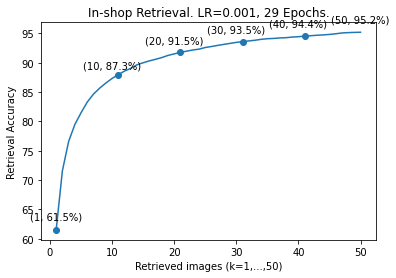

<Figure size 432x288 with 0 Axes>

In [6]:
from matplotlib import pyplot as plt
from config import *

plt.plot(list(acc_dict.keys()), list(acc_dict.values()),
         marker = 'o', markevery=10)
for i in (1, 10, 20, 30, 40, 50):
    plt.annotate(f"({i}, {acc_dict[i]:.1f}%)", (i, acc_dict[i]),
                 textcoords="offset points", # how to position the text
                 xytext=(0,10),
                 ha='center')

plt.title('In-shop Retrieval. LR=0.001, 29 Epochs.')
plt.xlabel('Retrieved images (k=1,...,50)')
plt.ylabel('Retrieval Accuracy')
plt.show()
plt.savefig("lr=0.001-29epochs.png")

In [4]:
acc_dict_new = {1: 42.80489520326347,
 2: 53.1650021100014,
 3: 58.5736390490927,
 4: 62.645941763961176,
 5: 65.54367702911802,
 6: 67.83654522436349,
 7: 69.65114643409763,
 8: 71.28288085525391,
 9: 72.48558165705444,
 10: 73.6671824447883,
 11: 74.75734983823322,
 12: 75.67871711914475,
 13: 76.61415107610073,
 14: 77.35968490645661,
 15: 78.03488535659024,
 16: 78.63271908847939,
 17: 79.19538613025742,
 18: 79.7158531439021,
 19: 80.30665353776902,
 20: 80.72162048108032,
 21: 81.29132086088057,
 22: 81.68518779012518,
 23: 82.09312139541426,
 24: 82.50105500070333,
 25: 82.88788859192573,
 26: 83.30285553523701,
 27: 83.66155577437051,
 28: 83.96398930932621,
 29: 84.24532283021522,
 30: 84.48445632297089,
 31: 84.76578984385989,
 32: 85.04712336474891,
 33: 85.2932901955268,
 34: 85.56759037839359,
 35: 85.69419046279364,
 36: 85.94035729357154,
 37: 86.08102405401603,
 38: 86.27092418061612,
 39: 86.41862427908286,
 40: 86.58742439161627,
 41: 86.77732451821635,
 42: 86.94612463074975,
 43: 87.11492474328317,
 44: 87.36109157406105,
 45: 87.55099170066113,
 46: 87.69869179912787,
 47: 87.83935855957237,
 48: 88.05739203826136,
 49: 88.14179209452806,
 50: 88.25432550288367}

In [5]:
acc_dict_new


{1: 42.80489520326347,
 2: 53.1650021100014,
 3: 58.5736390490927,
 4: 62.645941763961176,
 5: 65.54367702911802,
 6: 67.83654522436349,
 7: 69.65114643409763,
 8: 71.28288085525391,
 9: 72.48558165705444,
 10: 73.6671824447883,
 11: 74.75734983823322,
 12: 75.67871711914475,
 13: 76.61415107610073,
 14: 77.35968490645661,
 15: 78.03488535659024,
 16: 78.63271908847939,
 17: 79.19538613025742,
 18: 79.7158531439021,
 19: 80.30665353776902,
 20: 80.72162048108032,
 21: 81.29132086088057,
 22: 81.68518779012518,
 23: 82.09312139541426,
 24: 82.50105500070333,
 25: 82.88788859192573,
 26: 83.30285553523701,
 27: 83.66155577437051,
 28: 83.96398930932621,
 29: 84.24532283021522,
 30: 84.48445632297089,
 31: 84.76578984385989,
 32: 85.04712336474891,
 33: 85.2932901955268,
 34: 85.56759037839359,
 35: 85.69419046279364,
 36: 85.94035729357154,
 37: 86.08102405401603,
 38: 86.27092418061612,
 39: 86.41862427908286,
 40: 86.58742439161627,
 41: 86.77732451821635,
 42: 86.94612463074975,
 43: 

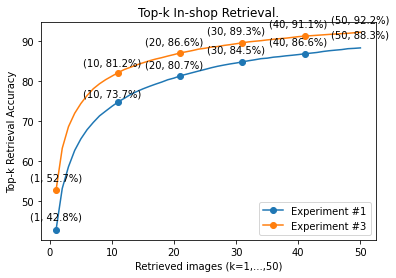

In [16]:
from matplotlib import pyplot as plt
from config import *

plt.plot(list(acc_dict_new.keys()), list(acc_dict_new.values()),
         marker = 'o', markevery=10, label="Experiment #1")
plt.plot(list(acc_dict.keys()), list(acc_dict.values()),
         marker = 'o', markevery=10, label="Experiment #3")
for i in (1, 10, 20, 30, 40, 50):
    plt.annotate(f"({i}, {acc_dict_new[i]:.1f}%)", (i, acc_dict_new[i]),
                 textcoords="offset points", # how to position the text
                 xytext=(0,10),
                 ha='center')
    plt.annotate(f"({i}, {acc_dict[i]:.1f}%)", (i, acc_dict[i]),
                 textcoords="offset points", # how to position the text
                 xytext=(0,10),
                 ha='center')

plt.title('Top-k In-shop Retrieval.')
plt.xlabel('Retrieved images (k=1,...,50)')
plt.ylabel('Top-k Retrieval Accuracy')
plt.legend(loc="best")
# plt.show()
plt.savefig("inshop-retrieval.png")
